# OPIM 3511 HW2 - Spring 2022
# DUE: 2/14/2022 11:59PM

Download your HW as a .ipynb file, then submit it to HuskyCT.

When sharing the link, please make sure you change your setting to "anyone with link can view".

In [ ]:
# import your libaraies here!

In [47]:
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sb

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Question 1

* Quality of Life Data
  * (clean .csv file from Dr. Dave ready to use! download and drag onto your Drive, then update the path) https://drive.google.com/file/d/1mfy3Ird6XJfZb4w_tuYnvKfypcxh9Spb/view?usp=sharing


1. Count the number of rows where `Quality of Life Index` is greater than 130. Make a new column called `Flag_QualityOfLife` where the value is `High` (i.e., value = 1 like the lecture example) if greater than 130, otherwise `Low ` (i.e., value = 0 like the lecture example).

In [35]:
df = pd.read_csv('/content/drive/MyDrive/QOL.csv')

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,Switzerland,190.82,110.96,78.65,74.47,131.75,8.42,28.73,20.09,80.05
1,2,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.80
2,3,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11
3,4,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64
4,5,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79
...,...,...,...,...,...,...,...,...,...,...,...
78,79,Philippines,78.39,19.71,57.84,67.09,40.65,30.14,44.04,74.06,61.03
79,80,Kenya,75.77,27.67,38.60,55.83,36.30,27.27,57.39,75.88,99.79
80,81,Bangladesh,65.27,24.07,35.78,42.70,33.31,14.43,58.53,84.91,72.91
81,82,Iran,64.73,19.00,50.81,52.25,41.34,34.24,47.43,76.13,70.99


In [38]:
df[df['Quality of Life Index']>130].count()

Rank                              42
Country                           42
Quality of Life Index             42
Purchasing Power Index            42
Safety Index                      42
Health Care Index                 42
Cost of Living Index              42
Property Price to Income Ratio    42
Traffic Commute Time Index        42
Pollution Index                   42
Climate Index                     42
dtype: int64

2. Make a 'pairplot' for the entire dataset. Make a pairplot using the original dataset, then make the `pairplot by group` where the `hue=Flag_QualityOfLife`.
(https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [39]:
def conditions(s):
  if (s['Quality of Life Index']>130):
    return 1
  else:
    return 0

In [40]:
df['Flag_QualityOfLife']=df.apply(conditions, axis=1)

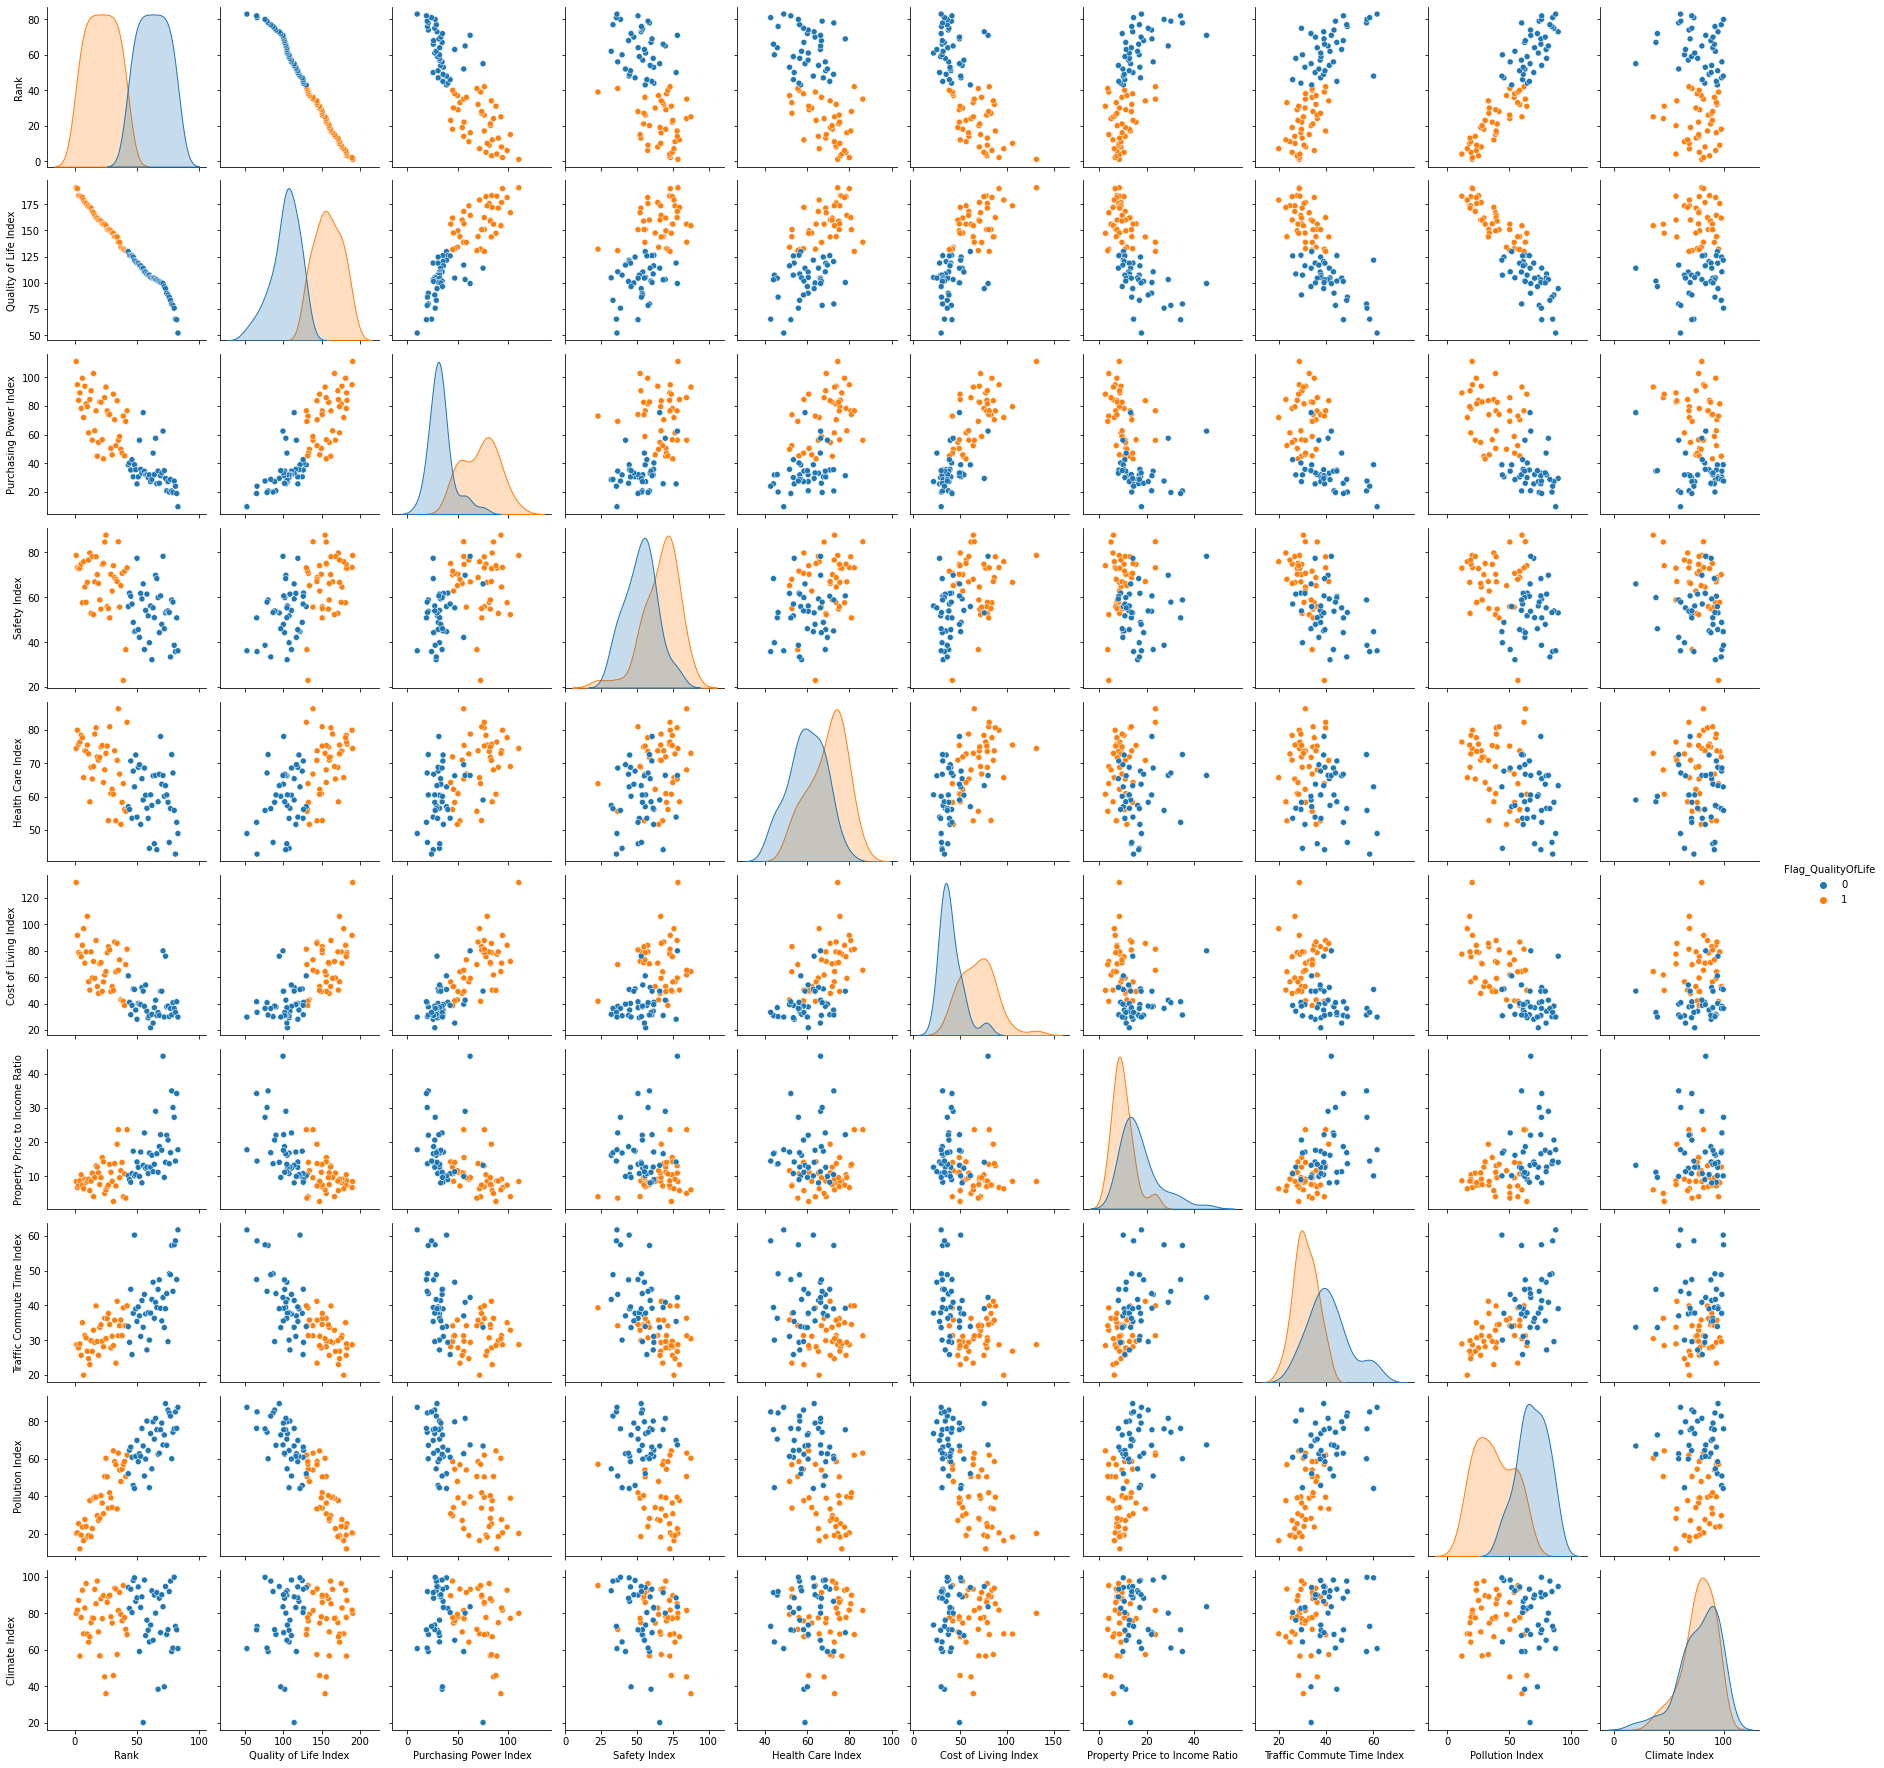

In [41]:
sb.pairplot(df, hue='Flag_QualityOfLife')

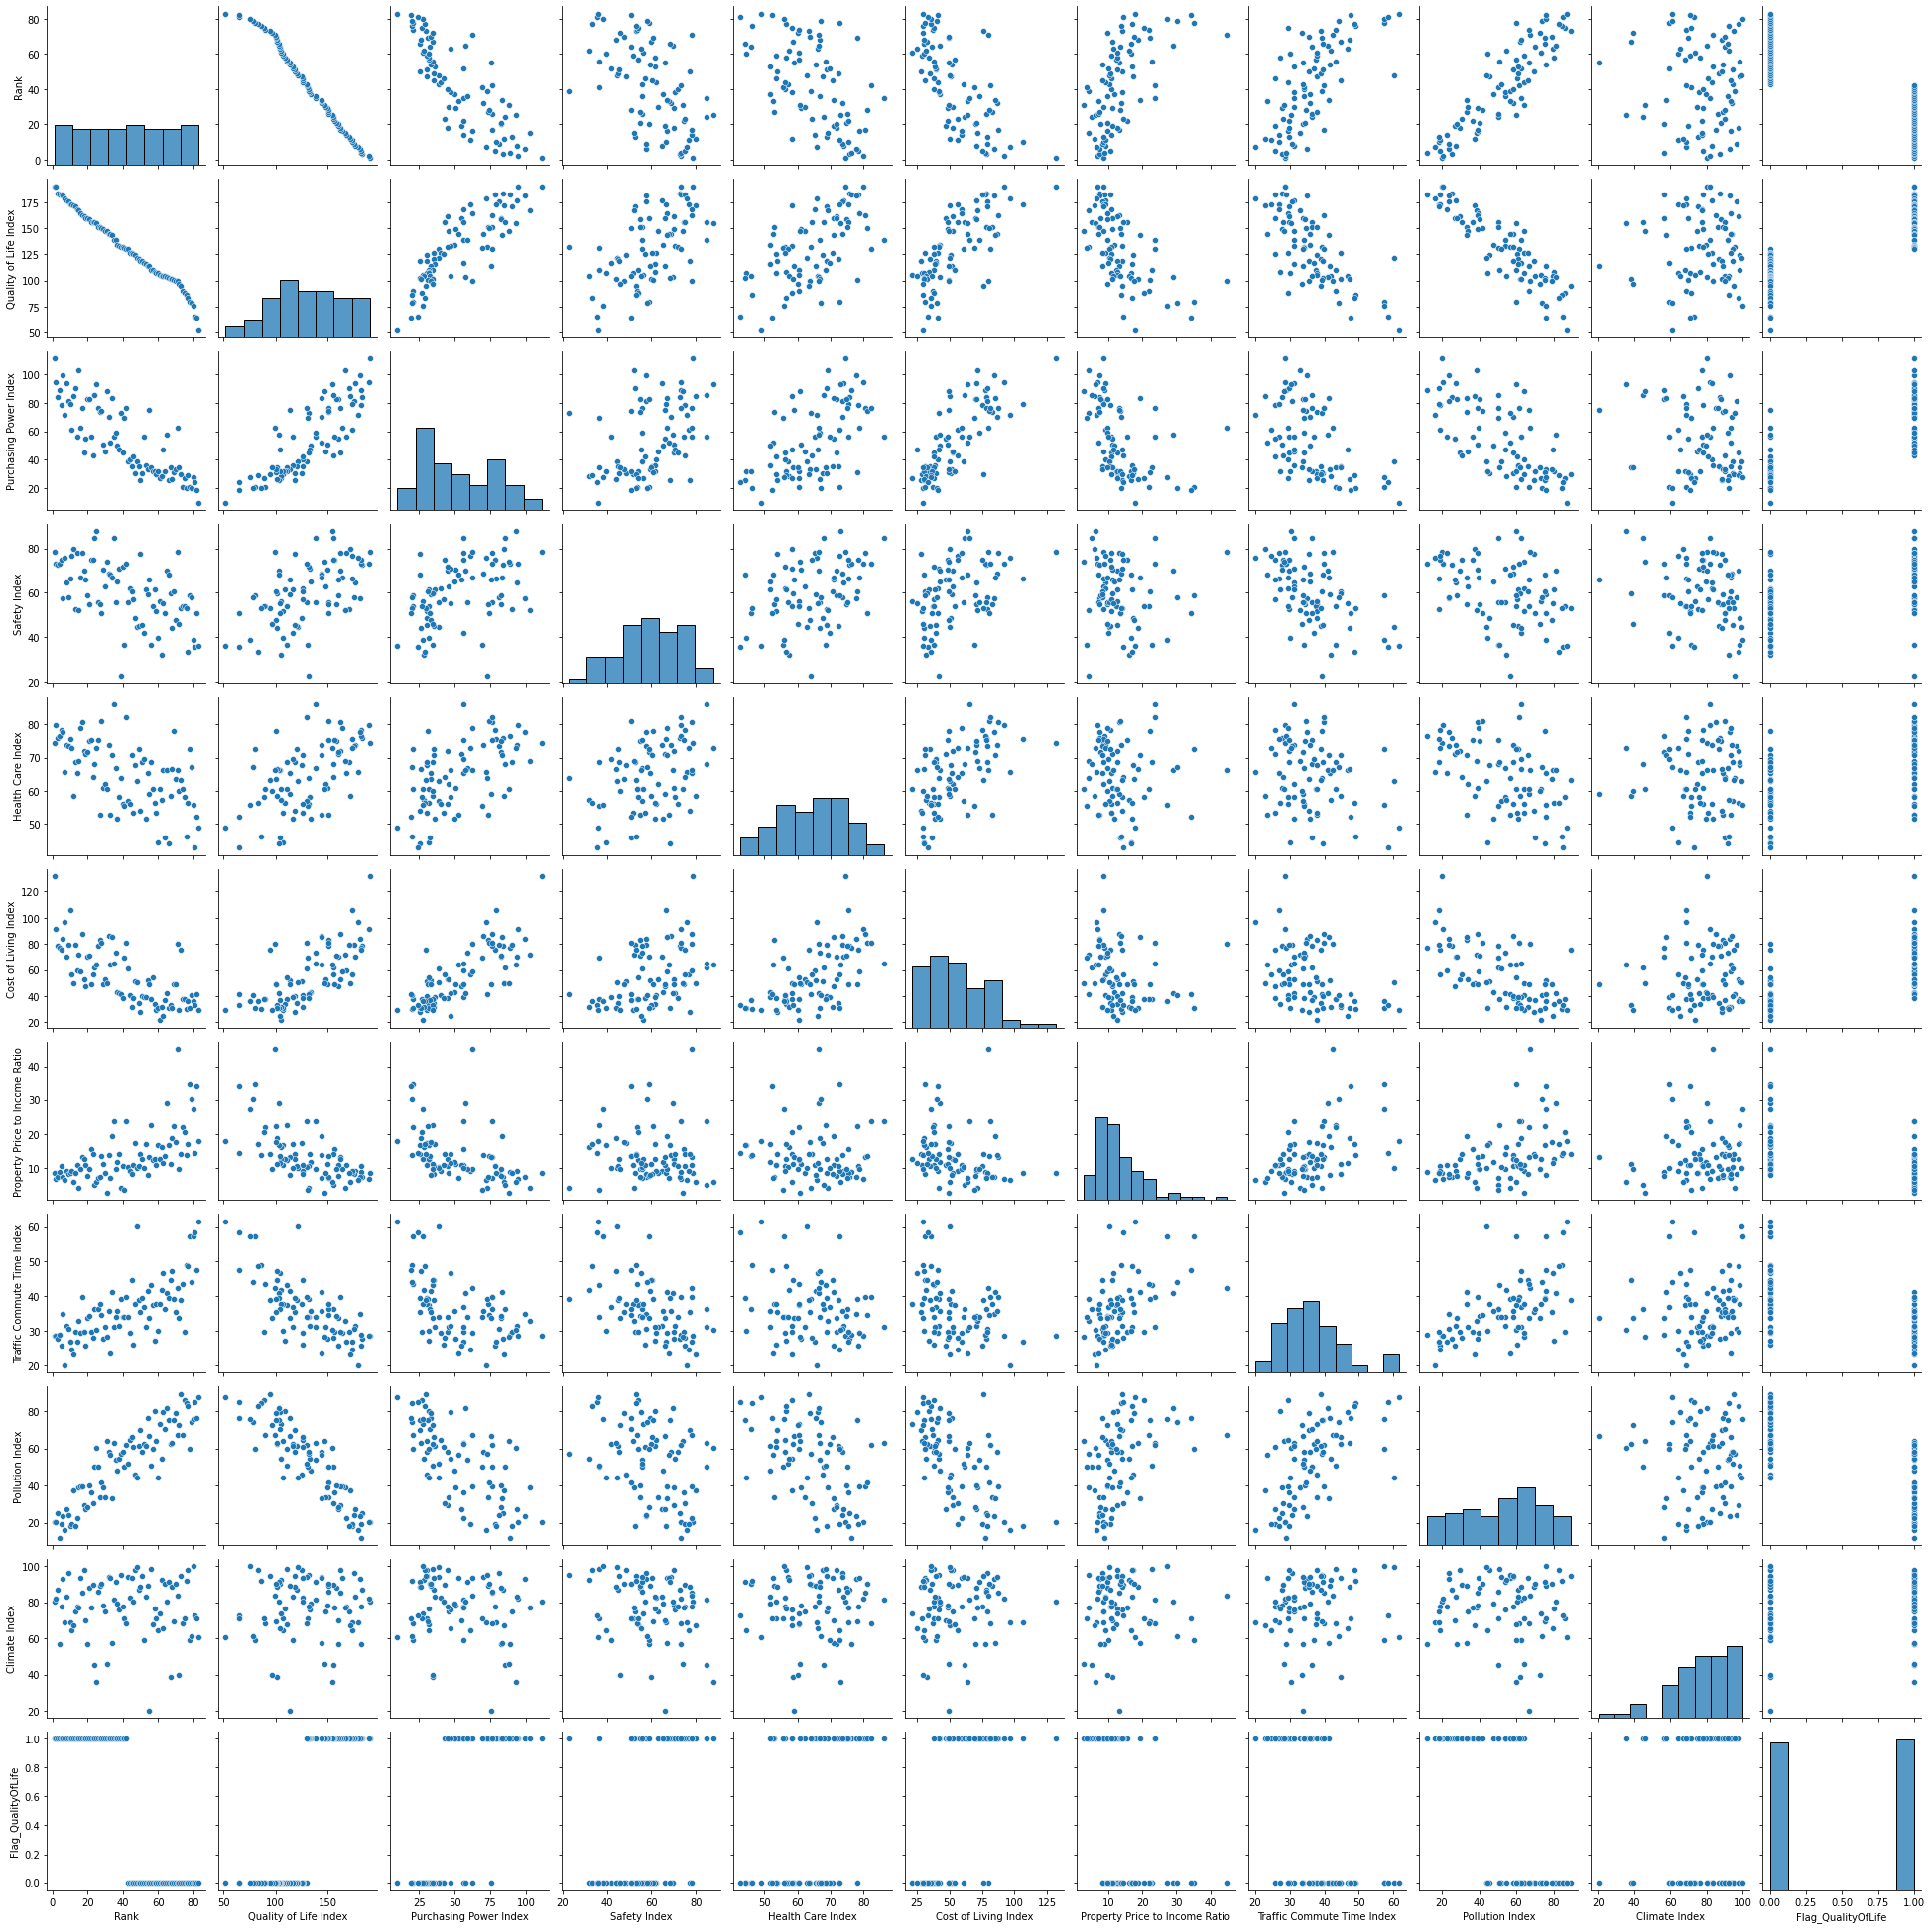

In [ ]:
sb.pairplot (df)

3. Write 3-5 bullet points in a text cell about some of the trends you see - for example, does the univariate distribution of some variables suprise you? What is the shape of the distributions? Is there a linear relationship between any of the variables? How do the explanatory variables relate to your target variable (`Quality of Life Index`)? 



* There seems to be a linear relationship between rank and quality of life index. The higher the rank of the country (i.e. 1 = higher, 100 = lower), the greater tha quality of life index

* There is a direct relationship between purchasing power index and quality of life index. This is not a surprise, as I would suspect countries with stronger economies to have greater quality of life

* There is an inverse relationship between polution index and quality of life index, which did not surprise me either

* Cost of living index is heavily skewed, which is about what I would suspect, due to rising income inequality





4. Calculate the 90th percentile of the `Quality of Life Index` column. Which countries have a `Quality of Life Index` greater than or equal to this value? (you can put your observation in a comment)

In [ ]:
print(df['Quality of Life Index'].quantile(q=.9))


175.32999999999998


5. Make a histogram of `df['Pollution Index']` with nice titles, axes labels and colored blue. Add a bullet point describing what you see.

Text(0.5, 1.0, 'Pollution Index')

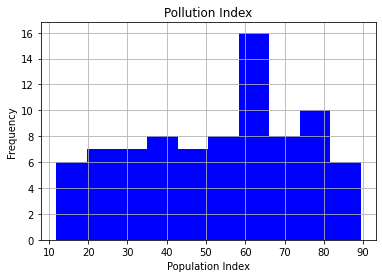

In [6]:
df.hist(column='Pollution Index', color = 'blue')
xlabel ('Population Index')
ylabel('Frequency')
title('Pollution Index')

* A population index between approx. 59 and 66 is the most common

6. Make a histogram of `df['Health Care Index']` with nice titles, axes labels and colored red. Add a bullet point describing what you see.

Text(0.5, 1.0, 'Health Care Index')

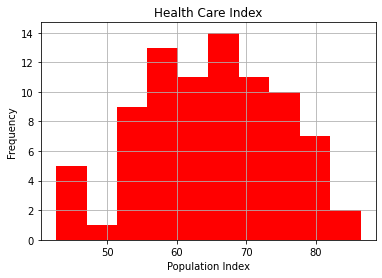

In [7]:
df.hist(column='Health Care Index', color = 'red')
xlabel ('Population Index')
ylabel ('Frequency')
title ('Health Care Index')

* Health care index seems to almost want to mirror a normal distribution, although it has some outliers and is skewed.

7. Make a scatterplot using `x = Health Care Index` vs. `y = Quality of Life Index`,  with nice titles, axes labels, and a [cool marker symbol of your choice](https://matplotlib.org/stable/api/markers_api.html).

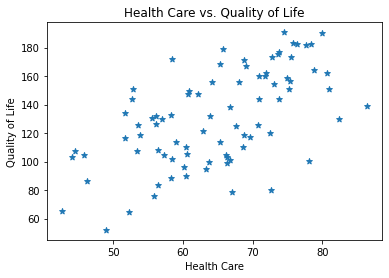

In [13]:
scatter(x=df['Health Care Index'],
        y=df['Quality of Life Index'],
        marker='*') 
xlabel('Health Care')
ylabel('Quality of Life')
title('Health Care vs. Quality of Life')
show()

8. Make a kernel density plot of `Purchasing Power Index` with `hue = Flag_QualityOfLife` [using seaborn](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). Describe what you see.

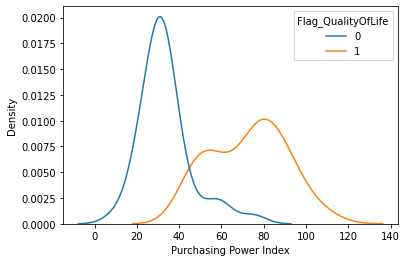

In [18]:
sb.kdeplot(x=df['Purchasing Power Index'], hue = df['Flag_QualityOfLife'])
show()

### Question 2

* Diabetes Data
 * https://drive.google.com/file/d/1eR5LpRJI1Ct9JV5O5yi-2vuDSTlU71zj/view?usp=sharing

* This is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:
  * 0: Number of times pregnant.
  * 1: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
  * 2: Diastolic blood pressure (mm Hg).
  * 3: Triceps skinfold thickness (mm).
  * 4: 2-Hour serum insulin (mu U/ml).
  * 5: Body mass index (weight in kg/(height in m)^2).
  * 6: Diabetes pedigree function.
  * 7: Age (years).
  * 8: Class variable (0 or 1).

* On some columns, a value of zero does not make sense and indicates an invalid or missing value. Specifically, the following columns have an invalid zero minimum value:
  * 1: Plasma glucose concentration
  * 2: Diastolic blood pressure
  * 3: Triceps skinfold thickness
  * 4: 2-Hour serum insulin
  * 5: Body mass index


1. use df.info to see the summary of this dataset

In [56]:
df = pd.read_csv('/content/drive/MyDrive/OPIM3511/pima.csv', header = None)

In [57]:
df.info

<bound method DataFrame.info of       0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]>

2. Count the number of missing values for columns (Plasma glucose concentration, Diastolic blood pressure, Triceps skinfold thickness, 2-Hour serum insulin, and Body mass index)

In [58]:
(df==0).sum()

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64

3. Replace '0' values (in Plasma glucose concentration, Diastolic blood pressure, Triceps skinfold thickness, 2-Hour serum insulin, and Body mass index) with 'nan'.

In [59]:
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, nan)

4. Drop rows with missing values

In [60]:
df.dropna(axis=0)

,0,1,2,3,4,5,6,7,8
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


5. Use the original dataset with missing values, fill missing values with mean column values.

In [61]:
df[1] = df[1].fillna(df[1].mean())